# Data Science: Introdução a análise de series temporais

Certificação: https://cursos.alura.com.br/certificate/3fa45a23-9ad6-4bbc-9cd9-9a0aaef1f2c6

<h2>Objetivo do treinamento:</h2>

<ul>
    <li>Aprender as principais técnicas de análise de Séries temporais</li>
    <li>Entender na prática quais os principais elementos presentes nas time series</li>
    <li>Saiber como aplicar a função de autocorrelação nos dados</li>
    <li>Aplicar a média móvel para normalizar os dados</li>
    <li>Desenvolver conhecimentos em Pandas, Seaborn e Matplotilib</li>
</ul>

<h2>Aulas</h2>

<ol>
    <li>Tendência das vendas</li>
    <li>Decomposição e autocorrelação</li>
    <li>Importância da decomposição e sazonalidade</li>
    <li>Normalização e statsmodels</li>
    <li>Ruídos e média móvel</li>
</ol>

## Importe de dados, carga e configurações

In [1]:
# Python version
from platform import python_version
print('Python version:', python_version())

Python version: 3.8.5


In [2]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


# Warnings remove 
import warnings
warnings.filterwarnings("ignore")

In [3]:
alucar = pd.read_csv('material/alucar.csv')

In [4]:
#configurações para os graficos
sns.set_palette('Accent')
sns.set_style('darkgrid')

def plotline(titulo, labelx, labely, x, y, dataset):
    #plota um grafico de linha
    ax = sns.lineplot(x=x, y=y, data= dataset)
    ax.figure.set_size_inches(12,6)

    ax.set_title(titulo, loc='left', fontsize='18')

    ax.set_xlabel(labelx, fontsize ='14')
    ax.set_ylabel(labely, fontsize ='14')
    ax=ax
    
def plot_comp(x, y1, y2, y3, dataset, titulo):
    #plota 3 graficos de linhas
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize='18',loc='left')
    sns.lineplot(x=x, y=y1, data= dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data= dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data= dataset)
    ax=ax

# 1. Tendência das vendas

In [5]:
# Quantidade de vendas por mês
alucar.head(3)

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33


In [6]:
alucar['mes'] = pd.to_datetime(alucar['mes'])

In [7]:
# Como vamos usar times series é importante que a coluna mês seja do tipo datetime
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

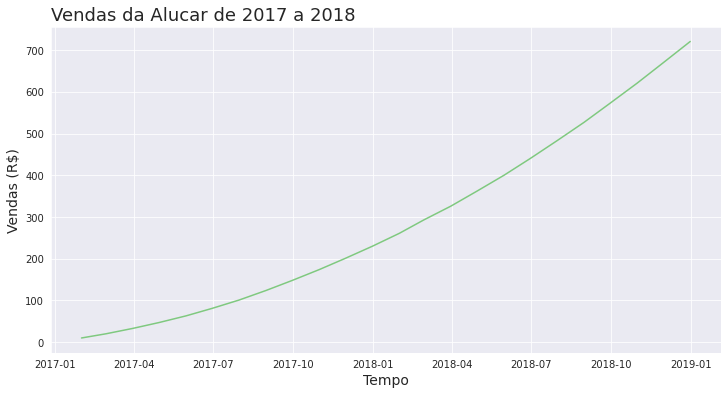

In [8]:
plotline(titulo = 'Vendas da Alucar de 2017 a 2018',
                                        labelx='Tempo',
                                        labely = 'Vendas (R$)',
                                        x = 'mes', 
                                        y = 'vendas', 
                                        dataset = alucar)

<strong>Com o passar do tempo é possível enchergar o aumento de vendas mês a mês</strong>

# 2. Decomposição e autocorrelação

In [9]:
# Deconpondo a série utilizando o diff()
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


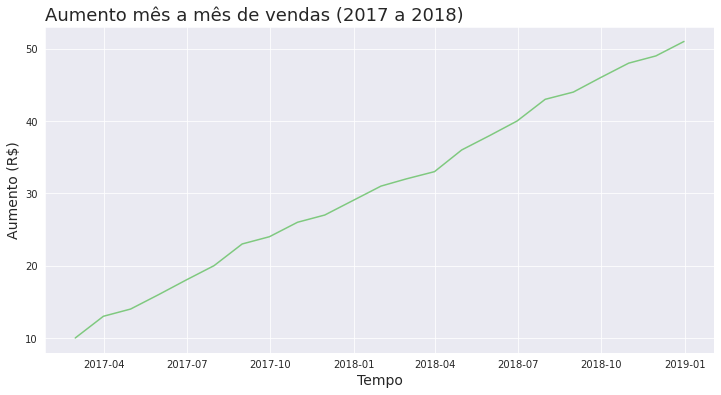

In [10]:
plotline(titulo = 'Aumento mês a mês de vendas (2017 a 2018)',
                                        labelx='Tempo',
                                        labely = 'Aumento (R$)',
                                        x = 'mes', 
                                        y = 'aumento', 
                                        dataset = alucar)

In [11]:
alucar['aceleracao'] = alucar['aumento'].diff()

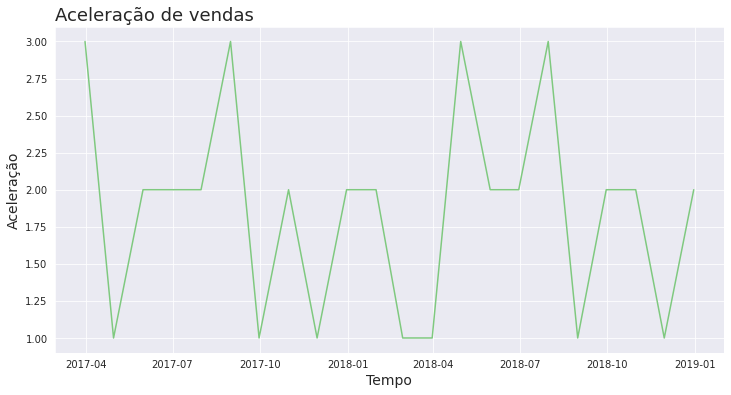

In [12]:
plotline(titulo = 'Aceleração de vendas',labelx='Tempo', labely='Aceleração', x='mes', y='aceleracao', dataset = alucar)

<strong>Aceleração de vendas oscilou entre entre 1 e 3, e não tivemos aceleração negativa.</strong>

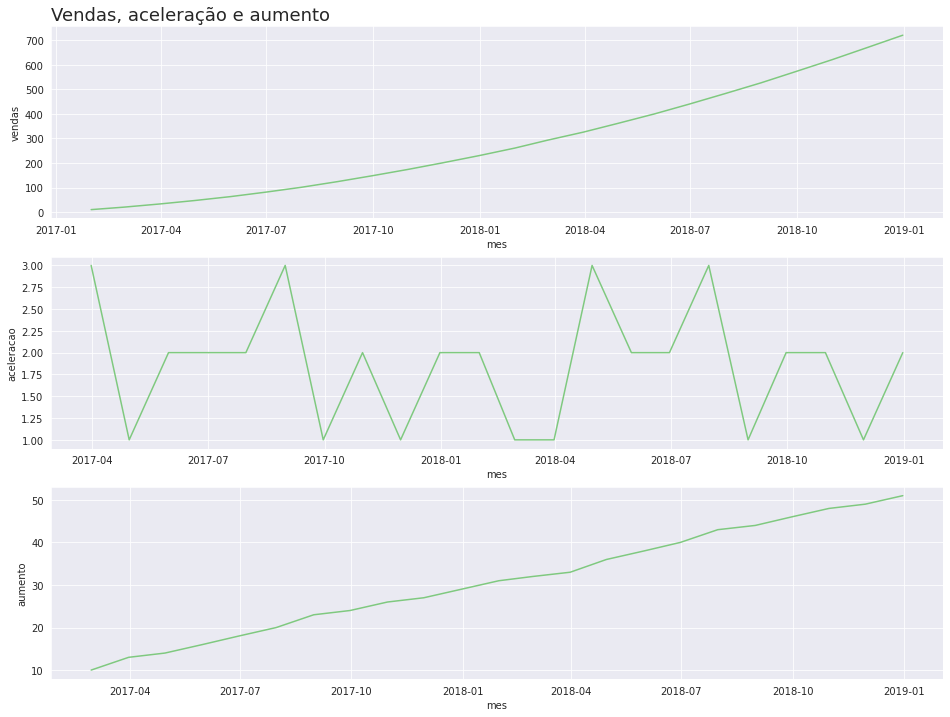

In [13]:
plot_comp('mes', 'vendas', 'aceleracao', 'aumento', alucar, 'Vendas, aceleração e aumento')



Autocorrelação	|Interpretação
---------------|--------------------
1	| correlação perfeita positiva
0,7 a 0,9	|correlação forte
0,4 a 0,7	|correlação moderada
0,2 a 0,4	|correlação fraca
0	|correlação nula
< 0	|correlação negativa
-1	|correlação perfeita negativa

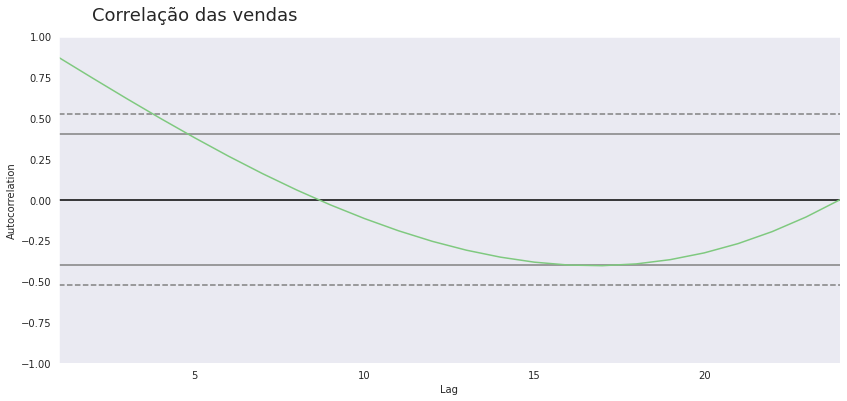

In [14]:
ax = plt.figure(figsize=(14,6))
ax.suptitle('Correlação das vendas', fontsize=18, x=0.26, y=0.95)
ax = autocorrelation_plot(alucar['vendas'])
ax=ax

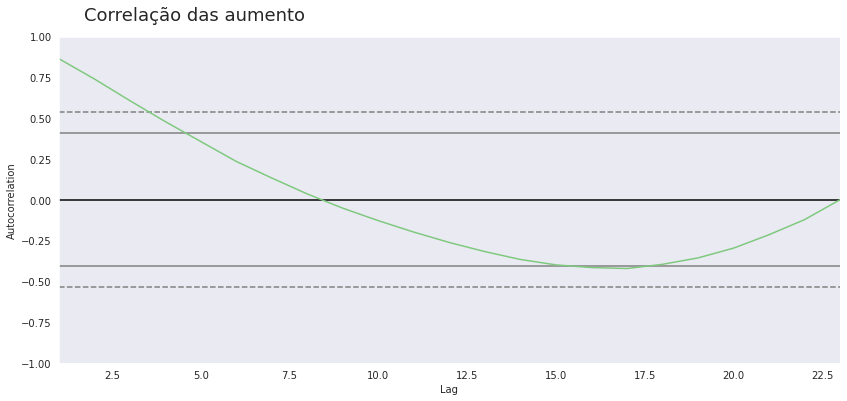

In [15]:
ax = plt.figure(figsize=(14,6))
ax.suptitle('Correlação das aumento', fontsize=18, x=0.26, y=0.95)
ax = autocorrelation_plot(alucar['aumento'][1:])
ax=ax

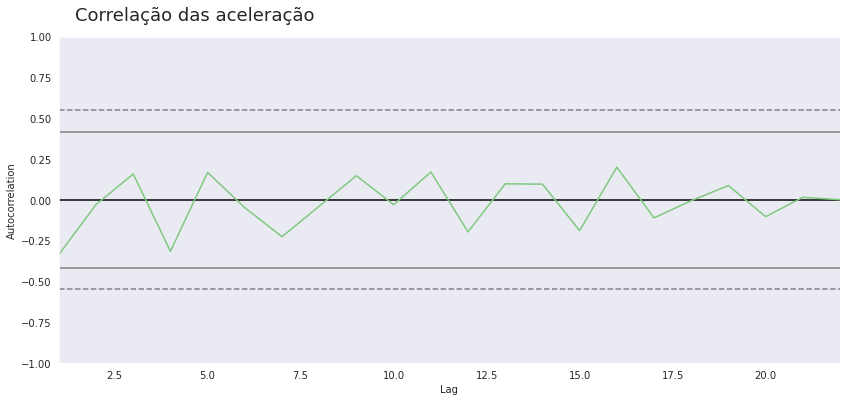

In [16]:
ax = plt.figure(figsize=(14,6))
ax.suptitle('Correlação das aceleração', fontsize=18, x=0.26, y=0.95)
ax = autocorrelation_plot(alucar['aceleracao'][2:])
ax=ax

# 3. Importância da decomposição e sazonalidade

In [17]:
# Analisando assinantes da newlsletter

assinantes = pd.read_csv('material/newsletter_alucar.csv')
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [18]:
print(f'Quantidade de linhas: {assinantes.shape[0]} \nQuantidade de colunas: {assinantes.shape[1]}')
print(f'Quantidade de dados nulos: {assinantes.isna().sum().sum()}')
print(f'----------------------------\n{assinantes.dtypes}')

Quantidade de linhas: 24 
Quantidade de colunas: 2
Quantidade de dados nulos: 0
----------------------------
mes           datetime64[ns]
assinantes             int64
dtype: object


In [19]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleração'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleração
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


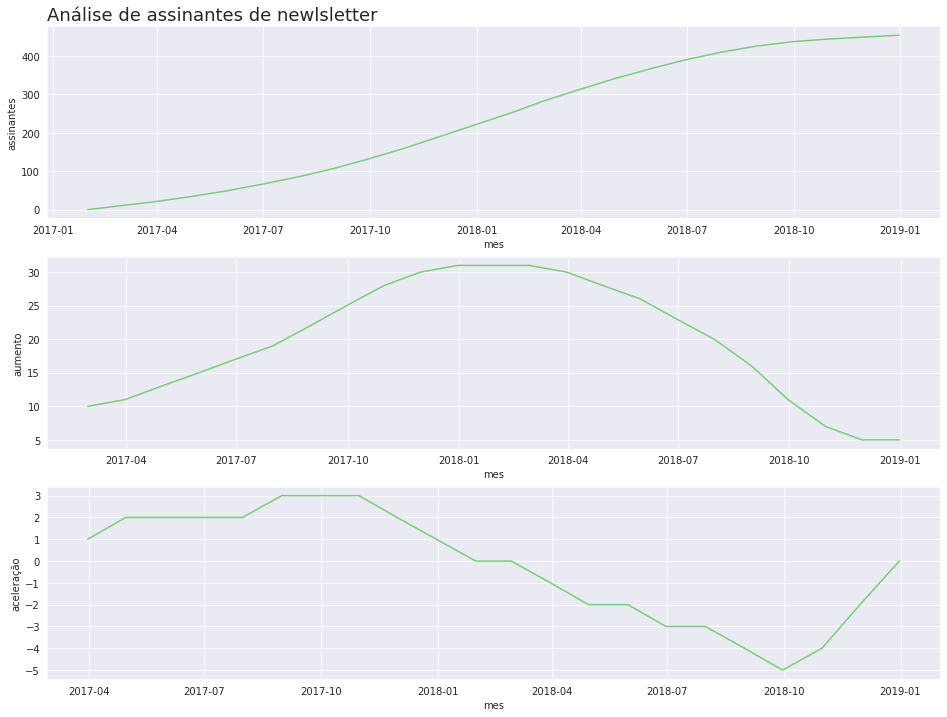

In [20]:
plot_comp('mes', 'assinantes', 'aumento', 'aceleração', assinantes, 'Análise de assinantes de newlsletter')

## Chocolura - Análise

In [21]:
chocolura = pd.read_csv('material/chocolura.csv')
chocolura['mes'] = pd.to_datetime(assinantes['mes'])
chocolura.head()

,mes,vendas
0,2017-01-31,210
1,2017-02-28,185
2,2017-03-31,209
3,2017-04-30,280
4,2017-05-31,211


In [22]:
print(f'Quantidade de linhas: {chocolura.shape[0]} \nQuantidade de colunas: {chocolura.shape[1]}')
print(f'Quantidade de dados nulos: {chocolura.isna().sum().sum()}')
print(f'----------------------------\n{chocolura.dtypes}')

Quantidade de linhas: 24 
Quantidade de colunas: 2
Quantidade de dados nulos: 0
----------------------------
mes       datetime64[ns]
vendas             int64
dtype: object


In [23]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleração'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleração
0,2017-01-31,210,NaN,NaN
1,2017-02-28,185,-25.0,NaN
2,2017-03-31,209,24.0,49.0
3,2017-04-30,280,71.0,47.0
4,2017-05-31,211,-69.0,-140.0


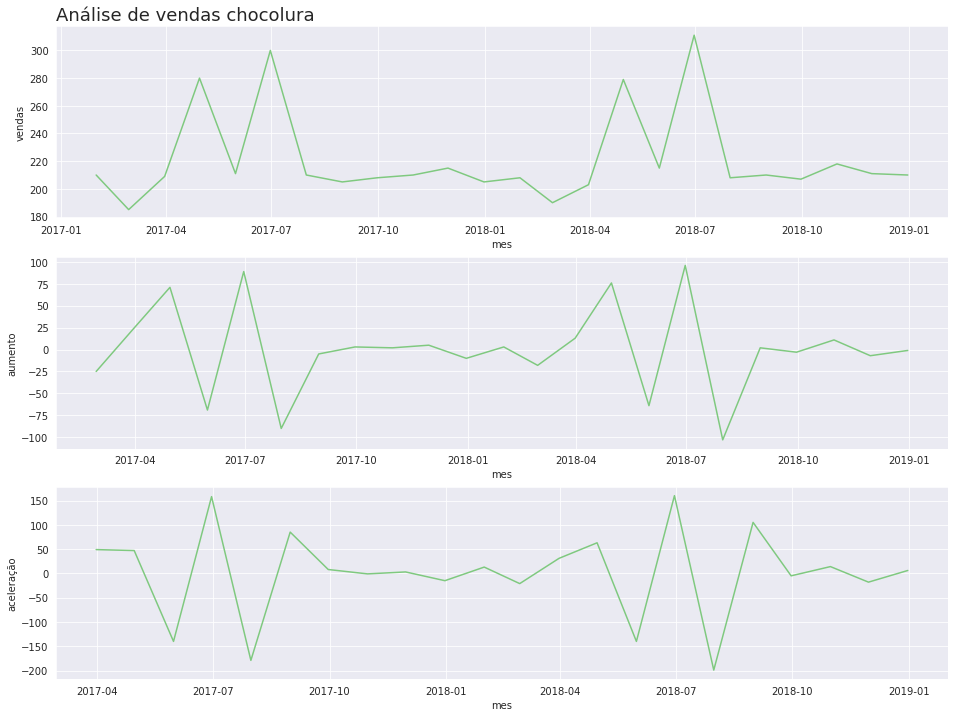

In [24]:
plot_comp('mes', 'vendas', 'aumento', 'aceleração', chocolura, 'Análise de vendas chocolura')

In [25]:
# Vendas por dia
vendas_dia = pd.read_csv('material/vendas_por_dia.csv')
vendas_dia['dia'] = pd.to_datetime(vendas_dia['dia'])
vendas_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [26]:
print(f'Quantidade de linhas: {vendas_dia.shape[0]} \nQuantidade de colunas: {vendas_dia.shape[1]}')
print(f'Quantidade de dados nulos: {vendas_dia.isna().sum().sum()}')
print(f'----------------------------\n{vendas_dia.dtypes}')

Quantidade de linhas: 61 
Quantidade de colunas: 2
Quantidade de dados nulos: 0
----------------------------
dia       datetime64[ns]
vendas             int64
dtype: object


In [27]:
vendas_dia['aumento'] = vendas_dia['vendas'].diff()
vendas_dia['aceleração'] = vendas_dia['aumento'].diff()
vendas_dia.head()

,dia,vendas,aumento,aceleração
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


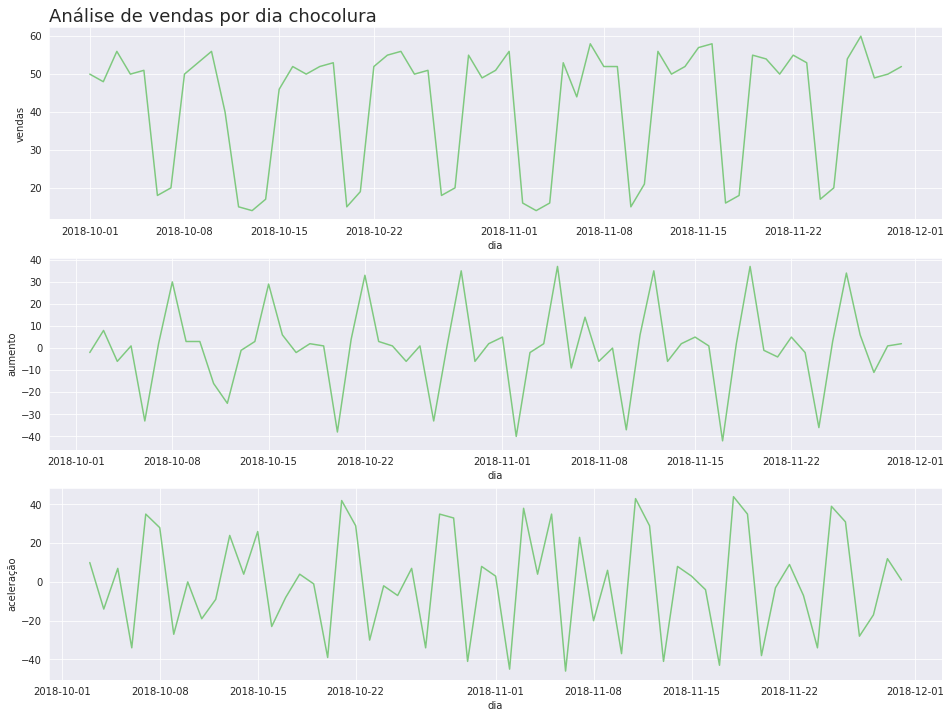

In [28]:
plot_comp('dia', 'vendas', 'aumento', 'aceleração', vendas_dia, 'Análise de vendas por dia chocolura')

In [29]:
# Análise de sazonalidade

vendas_dia['dia_da_semana'] = vendas_dia['dia'].dt.day_name()
vendas_dia.head()

,dia,vendas,aumento,aceleração,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [30]:
vendas_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [31]:
dias_trduzidos = {'Monday':'segunda', 'Tuesday':'terça', 'Wednesday':'quarta', 'Thursday':'quinta', 'Friday':'sexta', 'Saturday':'sabado',
       'Sunday':'domingo'}


In [32]:
vendas_dia['dia_da_semana'] = vendas_dia['dia_da_semana'].map(dias_trduzidos)
vendas_dia.head()

,dia,vendas,aumento,aceleração,dia_da_semana
0,2018-10-01,50,NaN,NaN,segunda
1,2018-10-02,48,-2.0,NaN,terça
2,2018-10-03,56,8.0,10.0,quarta
3,2018-10-04,50,-6.0,-14.0,quinta
4,2018-10-05,51,1.0,7.0,sexta


In [33]:
cendas_Agrupadas = vendas_dia.groupby('dia_da_semana')['vendas','aumento', 'aceleração'].mean().round()
cendas_Agrupadas

,vendas,aumento,aceleração
dia_da_semana,,,
domingo,19.0,3.0,31.0
quarta,53.0,1.0,2.0
quinta,51.0,-2.0,-3.0
sabado,16.0,-28.0,-20.0
segunda,52.0,34.0,31.0
sexta,45.0,-7.0,-5.0
terça,52.0,-1.0,-34.0


# 4. Normalização e statsmodels

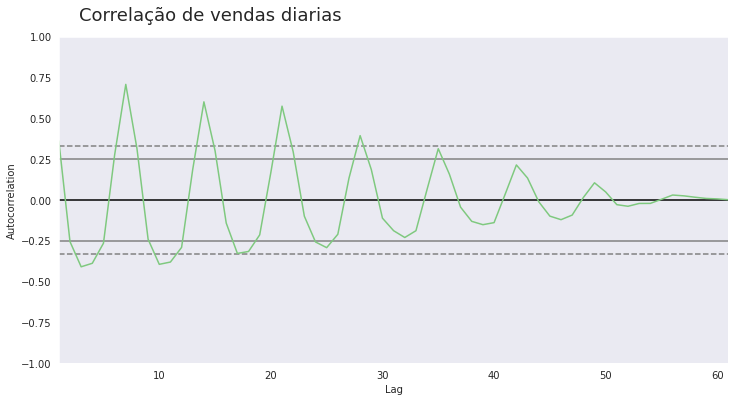

In [34]:
# Correlação de vendas diarias
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação de vendas diarias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_dia['vendas'])
ax=ax


In [35]:
# Cafelura - Análise de Vendas
cafelura = pd.read_csv('material/cafelura.csv')
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [36]:
print(f'Quantidade de linhas: {cafelura.shape[0]} \nQuantidade de colunas: {cafelura.shape[1]}')
print(f'Quantidade de dados nulos: {cafelura.isna().sum().sum()}')
print(f'----------------------------\n{cafelura.dtypes}')

Quantidade de linhas: 24 
Quantidade de colunas: 2
Quantidade de dados nulos: 0
----------------------------
mes       datetime64[ns]
vendas             int64
dtype: object


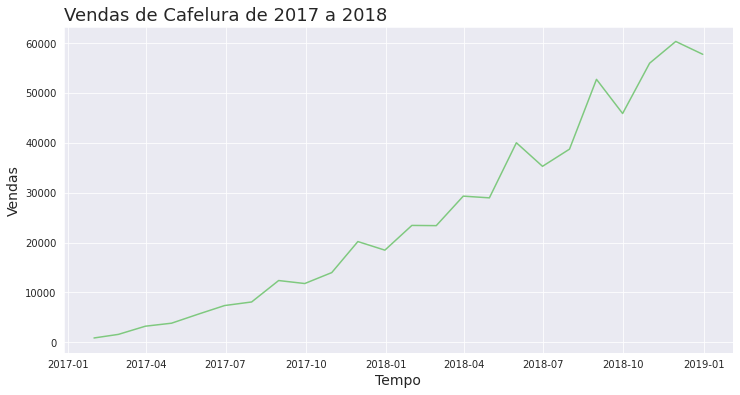

In [37]:
plotline('Vendas de Cafelura de 2017 a 2018', 'Tempo', 'Vendas', 'mes', 'vendas', cafelura)

In [38]:
quantidade_de_dias_de_fds = pd.read_csv('material/dias_final_de_semana.csv')
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [39]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / quantidade_de_dias_de_fds['quantidade_de_dias']
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


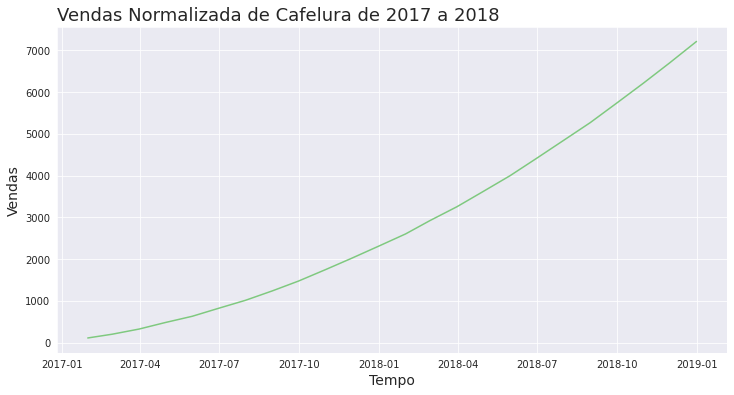

In [40]:
plotline('Vendas Normalizada de Cafelura de 2017 a 2018', 'Tempo', 'Vendas', 'mes', 'vendas_normalizadas', cafelura)

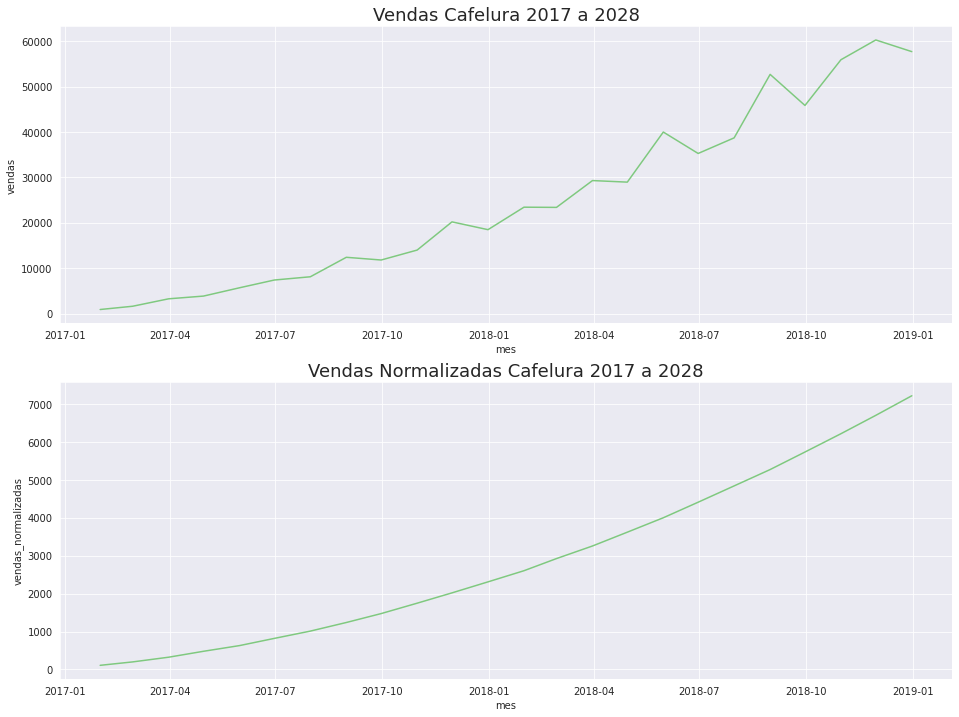

In [41]:
plt.figure(figsize=(16,12))
ax = plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 a 2028', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax = plt.subplot(2,1,2)
ax.set_title('Vendas Normalizadas Cafelura 2017 a 2028', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax=ax

## Statesmodels

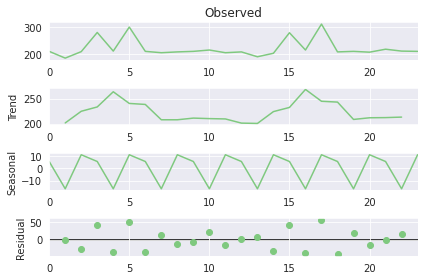

In [42]:
resultado = seasonal_decompose(chocolura['vendas'].values, model='additive', period=3)
ax = resultado.plot()
ax=ax

In [43]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [44]:
data = ({
       'observacao':observacao,
       'tendencia':tendencia, 
       'sazonalidade':sazonalidade,
       'ruido':ruido
})
resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


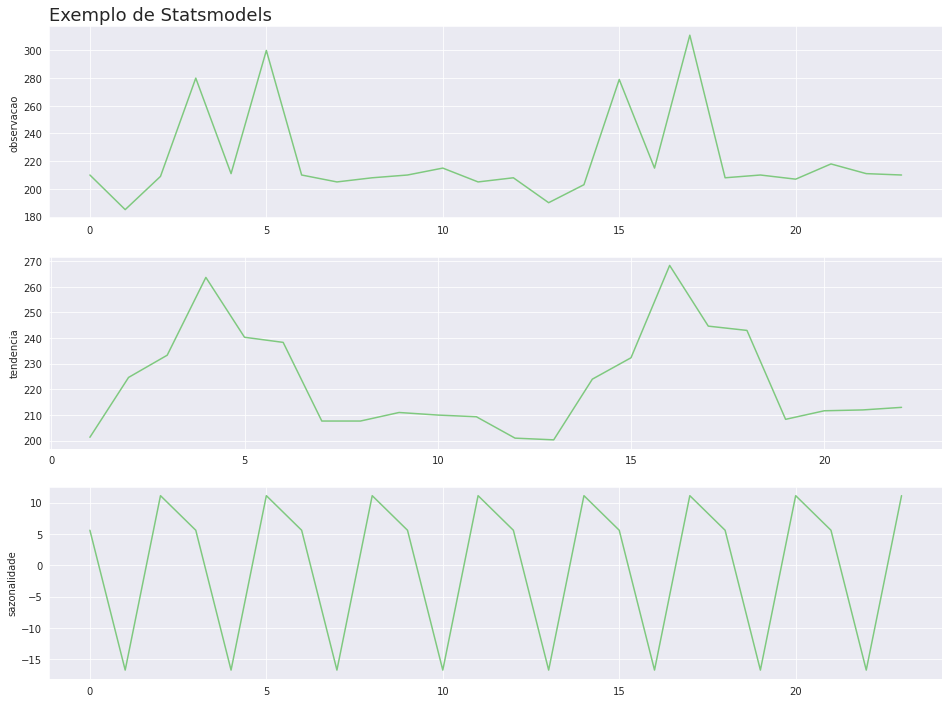

In [45]:
plot_comp(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado, 'Exemplo de Statsmodels')

# 5. Ruídos e média móvel

In [46]:
alucel = pd.read_csv('material/alucel.csv')
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [47]:
print(f'Quantidade de linhas: {alucel.shape[0]} \nQuantidade de colunas: {alucel.shape[1]}')
print(f'Quantidade de dados nulos: {alucel.isna().sum().sum()}')
print(f'----------------------------\n{alucel.dtypes}')

Quantidade de linhas: 61 
Quantidade de colunas: 2
Quantidade de dados nulos: 0
----------------------------
dia       datetime64[ns]
vendas           float64
dtype: object


In [48]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleração'] = alucel['aumento'].diff()
alucel.head()

,dia,vendas,aumento,aceleração
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


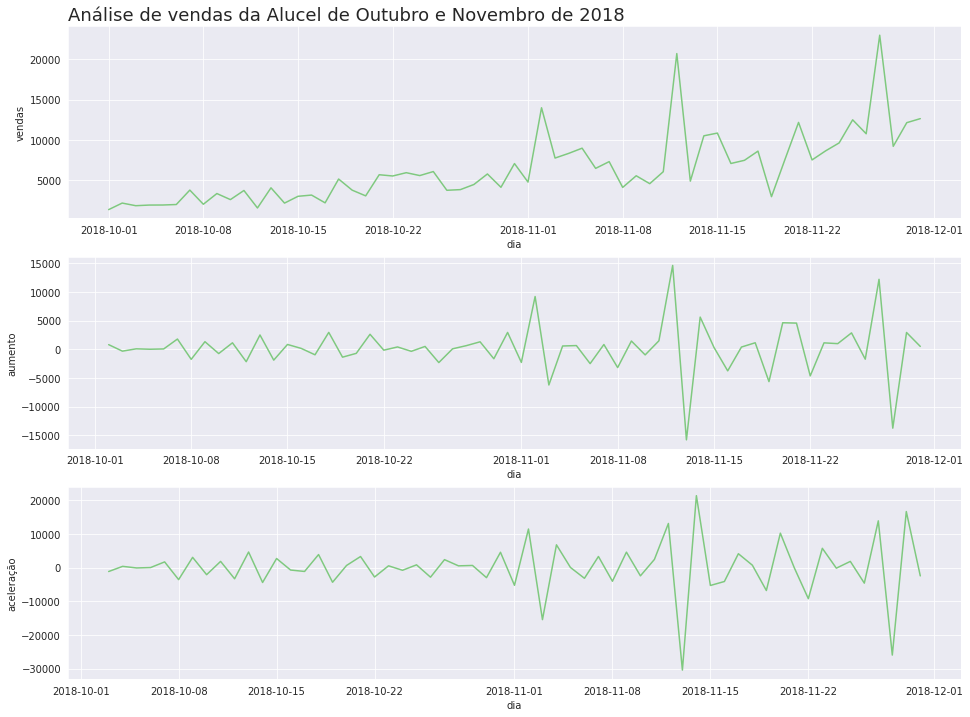

In [49]:
plot_comp('dia', 'vendas', 'aumento', 'aceleração', alucel, 'Análise de vendas da Alucel de Outubro e Novembro de 2018')

In [50]:
# Média móvel

alucel['media_movel'] = alucel['vendas'].rolling(7).mean()
alucel.head(7)

,dia,vendas,aumento,aceleração,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


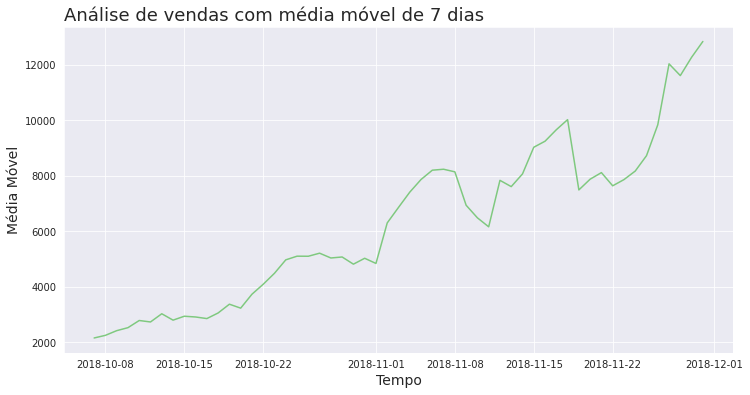

In [51]:
plotline('Análise de vendas com média móvel de 7 dias', 'Tempo', 'Média Móvel',
        'dia', 'media_movel', alucel)